In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import numpy as np
from matplotlib import pyplot as plt
import igraph

import pythd

C:\Users\Kbrown\Anaconda2\envs\pytorch\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
# Function to create a dataset of a circle at a given point
def create_circle(c=np.array([0.0, 0.0]), r=1.0, noise=0.0, n=20):
    delta = 2.0*np.pi / n
    theta = np.linspace(0.0, 2.0*np.pi, num=n, endpoint=False)
    c = np.array(c)
    
    x = c[0] + r*np.cos(theta) + np.random.normal(scale=noise, size=theta.shape)
    y = c[1] + r*np.sin(theta) + np.random.normal(scale=noise, size=theta.shape)
    return np.array([x, y]).T

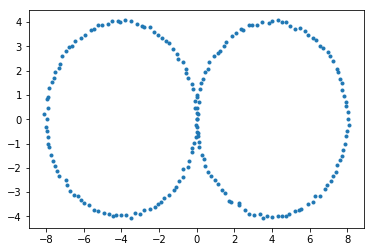

In [44]:
# Create and show two circles with some noise
circ1 = create_circle(c=[-4.0, 0.0], r=4.0, noise=0.05, n=100)
circ2 = create_circle(c=[4.0, 0.0], r=4.0, noise=0.05, n=100)
dataset = np.concatenate((circ1, circ2))
plt.plot(dataset[:, 0], dataset[:, 1], ".")
plt.show()

In [74]:
# Setup MAPPER
filt = pythd.filter.ComponentFilter(0) # filter: x component
f_x = filt(dataset)
cover = pythd.cover.IntervalCover1D.EvenlySpacedFromValues(f_x, 10, 0.75)
clustering = pythd.clustering.HierarchicalClustering()

In [75]:
# Run MAPPER
mapper = pythd.mapper.MAPPER(filter=filt, cover=cover, clustering=clustering)
res = mapper.run(dataset)

In [76]:
# Create igraph graph
g = res.get_igraph_network()
print(g)

IGRAPH UN-- 15 40 --
+ attr: name (v), points (v)
+ edges (vertex names):
 0 -- 1, 2, 3, 4, 5, 6, 7            7 -- 0, 4, 5, 6                    14 --
1, 2, 3, 8, 9, 10, 12
 1 -- 0, 2, 3, 4, 5, 6, 13, 14       8 -- 2, 3, 9, 10, 11, 12, 13, 14
 2 -- 0, 1, 3, 4, 5, 8, 13, 14       9 -- 3, 8, 14
 3 -- 0, 1, 2, 8, 9, 11, 13, 14     10 -- 8, 14
 4 -- 0, 1, 2, 6, 7                 11 -- 3, 8, 13
 5 -- 0, 1, 2, 6, 7                 12 -- 8, 14
 6 -- 0, 1, 4, 5, 7                 13 -- 1, 2, 3, 8, 11


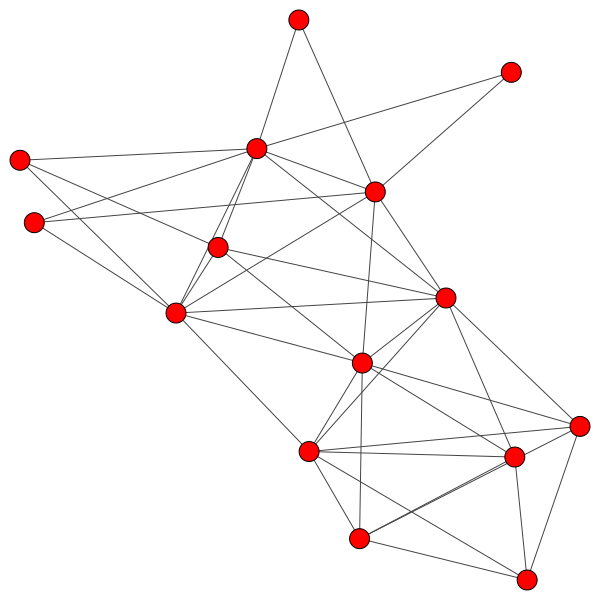

In [77]:
# Visualize the graph
layout = g.layout_kamada_kawai()
igraph.plot(g, layout=layout)

C:\Users\Kbrown\Anaconda2\envs\pytorch\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


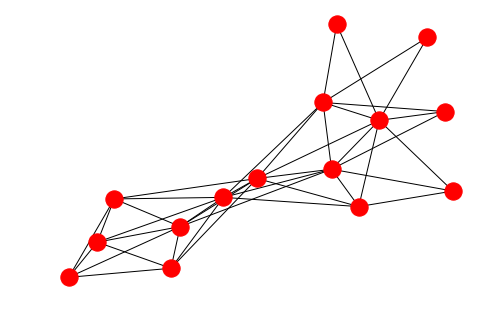

In [56]:
# Visualize with networkx
import networkx as nx
g = res.get_networkx_network()
nx.draw(g)

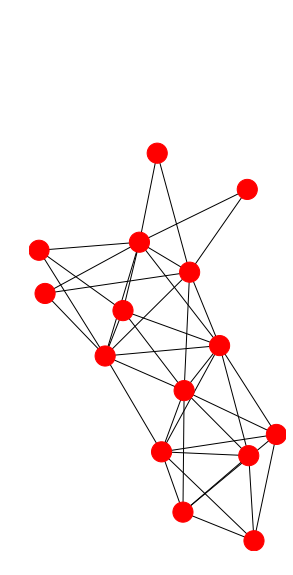

In [87]:
from importlib import reload
import pythd.plotting as plot
reload(plot)
plot.draw_2_skeleton(res.compute_k_skeleton(k=2), layout)